
# Building the HAFFA Logo

<svg>
<ellipse style="fill:#00ff00;stroke:#000000;" cx="50" cy="50" rx="48" ry="48">
<ellipse>
</svg>

The HAFFA logo was originally drawn up by Diane Basta and scanned to provide an image file. That image file has been in use for a long time, appearing on club hats, tee-shirts and the club website. However, scaling the logo up for use on banners, or incorporating it in a badge for use on models or membership cards has not been practical. 

<img src="_images/haffa-logo.jpg">

In this note, we will construct an SVG file that can provide the missing functionality. We will use a Python Jupyter notebook so you can see how this new logo is being generated from the original club logo.

## Logo Components

The original logo has five basic elements:

1. The US Flag

2. A heart shape mask used to cut off parts of the flag

3. A Modeler launching an airplane

4. A free-flight  model

5. The text "HAFFA" styled in what looks like the papyrus font

## Tracing the image file

I started off by using **Snagit** to crop off the modeler, airplane and HAFFA text from the image file. The flag and heart are well defined, so there was no need to attempt to process those parts of the logo image. I broke up the text into the three letters used so each could be processed individually.

Ouce I had isolated those components, I used **Inkscape** to trace the  parts, producing a rough SVG version of each item. The resulting vector form of each component was very messy, since the resolution of the images used was fairly low. 

I then manually edited the images using **Inkscape**, deleting many of the generated points to smooth up the final SVG for each item. Here are the component files I produced:

### Pilot:

<img src="_images/haffa-pilot.svg">

### Airplane:

<img src="_images/haffa-airplane.svg">

### Letter H:

<img src="_images/haffa-letter-H.svg">

### Letter A:

<img src="_images/haffa-letter-A.svg">

### Letter F:

<img src="_images/haffa-letter-F.svg">

All of these elements stll retail the hand-drawn feel. We may tweak them as we build large format images from the final SVG we produce.


## Create a Basic SVG file

SVG is a text format, based on XML, which uses "tags" to identify each fundamental component of an image. If you have not seen this type of markup before, the idea is pretty simple. Here is a basic "tag":

    <tagname parameters>
      tag body
    </tag>
    
Other tags can be placed in the tag body area producing a nested structure. It is common to indent those nested elements for readability.

SVG defines a lot of tag names, each performing some action when the image file is displayed. Some tags cause visible drawing effects to appear. Other tags are mre administrative in nature.

For instance, the outermost tag in any SVG file is the 88svg88 tag itself. we will see an example of this in a bit.

We could just type up the svg file directly, but there are many calculations needed to come up with coordinate values we will need to placing the components of the logo, so I decided to generate the logo file using **Python**. 

Assuming that you have a machine with **Python** installed, you will need to install the **drawSVG** package using the standard python **pip** tool if you want to follow along with this process. 

Let's make sure we have the required setup with a simple test.

In [18]:
import drawSVG

ModuleNotFoundError: No module named 'drawSVG'

If you see no errors, things are ready to go.

We need to define the drawing area we will be using to create this logo. SVG uses a simple user coordinate system, which traditionally maps to pixels on a computer screen. The physical size of the image depends on the resolution of the display you use to view the final image, so we assume it is just a dimensionless integer numbe3r that ranges from zero to some value in each direction. Normally, SVG sets up a coordinate system that is a bit odd to most humans. the **x** coordinate runs from zero at the left side of the image to some number at the right of the image. The **y** coordinate starts at zero at the top of the image, and runs down to some value. Fortunately, we specify the size of the drawing area in user coordinates using simple **width** and **height** parameters.

SInce the logo will be used in a circular badge, we will begin by setting up a square space for the logo. The size is not especially important, but should be big enough so we can place components on the image properly. To make this easy, we will make the size of one side of the square 1000 points wide.

In [31]:

width = 1000
height = 1000

svg = drawSvg.Drawing(1000, 1000, origin="center")

# Draw an irregular polygon
svg.append(draw.Lines(0, 0,
                    500, 0,
                    500, 500,
                    0, 500,
                    close=True,
            fill="yellow",
            stroke="black",
            stroke_width="5"))

We could display this directly, but looking at the generated SVG will be handy for debugging the work we are going to do.

Here is how we generate an SVG file from this test code"

In [32]:
svg.saveSvg("_images/test1.svg")

We can create a simple python function to display our SVG files.

In [33]:
def show(filename):
    with open('_images/%s' % filename) as fin:
        lines = fin.readlines()
    for l in lines:
        print(l.rstrip())

In [29]:
show("test1.svg")

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"
     width="1000" height="1000" viewBox="0 -1000 1000 1000">
<defs>
</defs>
<path d="M0,0 L500,0 L500,-500 L0,-500 Z" fill="yellow" stroke="black" stroke-width="5" />
</svg>


the **drawSvg** package is doing a trick here. SVG uses a second concept, the **viewport** to set up a world coordinate system that we will look through to see our actual image. In this example code, the **viewport** is being set up so we can think of our drawing coordinates in more normal (for humans) coordinates with **y** moving up. If you look at the coordinates used in the **draw.Lines** function pairs are pairs of values defining an **x**,**y** point. The first point starts the drawing, and lines are drawn between each next point and the previous point specified. That gives three sides for the example box. The final side is created by "closing" the polygon. The entire box is filled using a color code (yellow in this case) specified on the **fill** parameter. 

Here is the image we created:

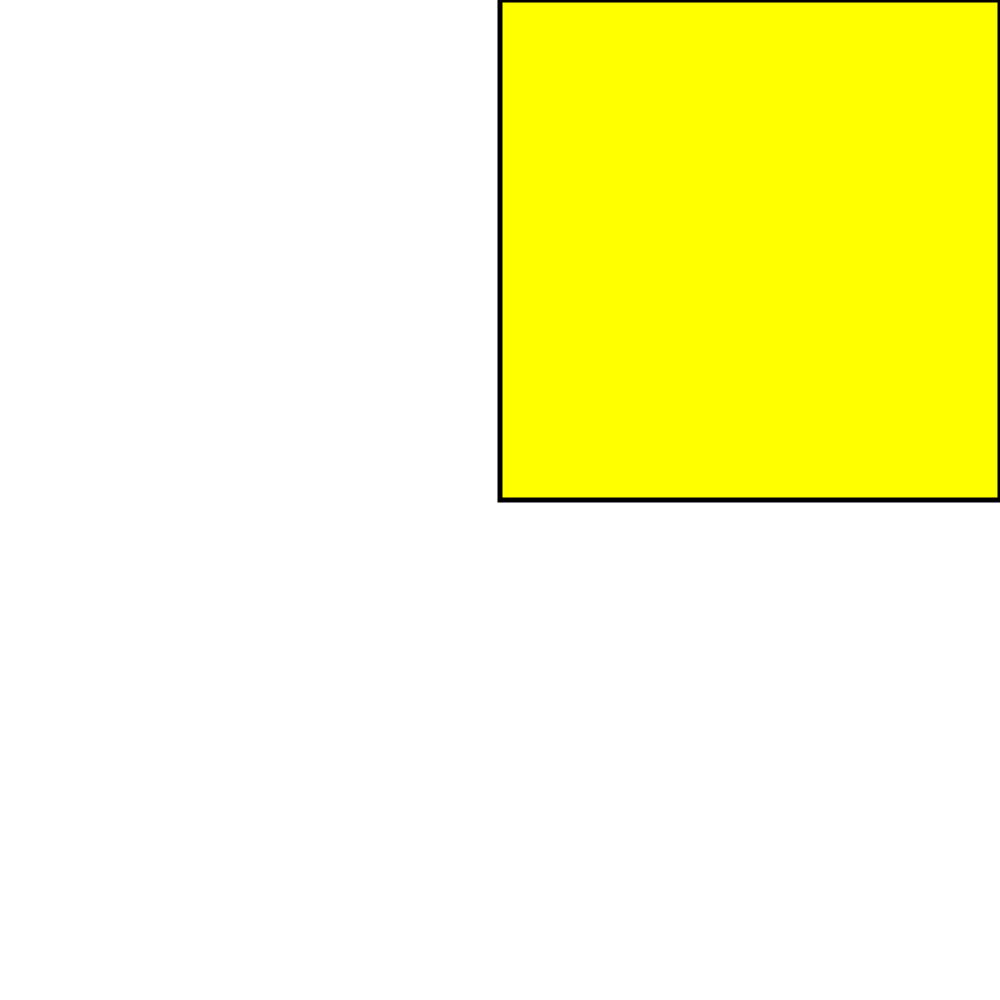

In [34]:
svg

The image is scaled to fit the screen, but represents a normal piece of paper. There is a lot of extra space shown, but this image is showing an entire piece of paper, scaled to fit the width of the screen. We can eliminate all the blank space for testing by lowering the size of the drawing area. Since one of the goals of this effort is to produce a circluar badge containing the logo, we will switch to a square drawing canvas for future tests.


### Examining the test svg code

SVG code is based on XML and looks a lot like HGTML as well. That means it is based on blocks of code enclosed between "tags"

Tags in SVG are names surrounded by angle brackets. Each defined tag specifies some kind of graphics component. These components may actually produce visible drawing elements, but othere are more administrative in nature.

Each tag appear in two forms:  there is an "open" tag and a "close" tag. The difference is that the name of the tag begins with a slash on the "close tag. Between these two tags, other SVG code will be contained. It is important that tags "nest' properly. You cannot start a tag inside of another tag pair and not close it before the outer closing tag.

The open tag can contain a set of parameters, which are space separqted parameter. Each parameter has a name followed by an equal sign, then the parameter value in quotes. The available parameters depend on the tag being used. 

The most important tag is the **svg** tag, which surrounds all code needed to produce a single image. The parameters in that **svg** tag set up the canvas and coordinate systems we will use. 

There is an empty set of tags named **def** that are not being used in this example. Finally, the box is displayed by defining the **path** to be drawn. The commands that actually draw the box are coded inside the string assigned to the parameter **d**. The individual SVG commands are simple to understand. but there are sev3ral of them available.

1. **M** - mve a pen from wherever it is now to the specified coordinate. The pen is "up", meaning nothing is being drawn.

2. **L** - draw  linw from the previous position to the indicated coordinate. In this case a straight line id drawn. The color of the lne and the size of the pen are controlled by the **stroke** and **stroke-width** parameters.

3. **Z** - this colses a polygon drawn as a series of stratght lines. The final line will run from the last point specified to the first point specified. This should create a closed area suitable for "filling" with some color. 

## Creating a US Flag

The geometry of the US Flag is well defined. Basically, it is a simple rectangle with the width 1.9 times the height. We will place thirteen equal height stripes on this rectangle. If we start off with each stripe set to 100 high, then the flag dimensions are:

In [7]:
stripe_height = 100
flag_height = 13 * stripe_height
flag_width = 1.9 * flag_height

print(flag_width, flag_height)

2470.0 1300


The basic flag rectangle can now be set up:

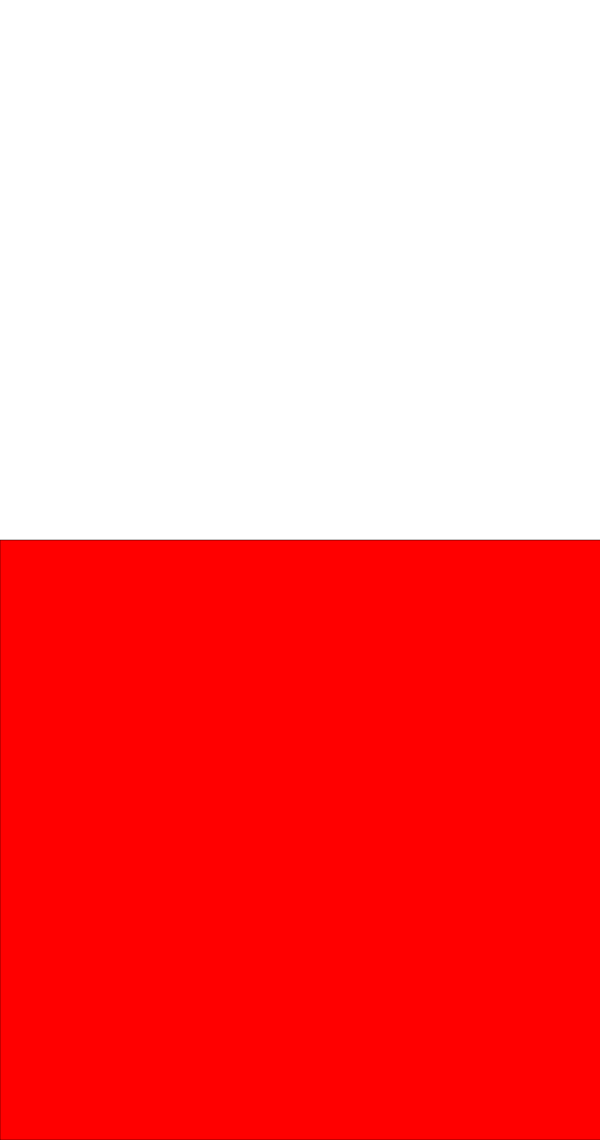

In [8]:
flag = draw.Drawing(flag_height, flag_width)

# Draw an irregular polygon
flag.append(draw.Lines(0, 0,
                    flag_width, 0,
                    flag_width, flag_height,
                    0, flag_height,
                    close=True,
            fill='red',
            stroke='black'))
flag.setRenderSize(600)

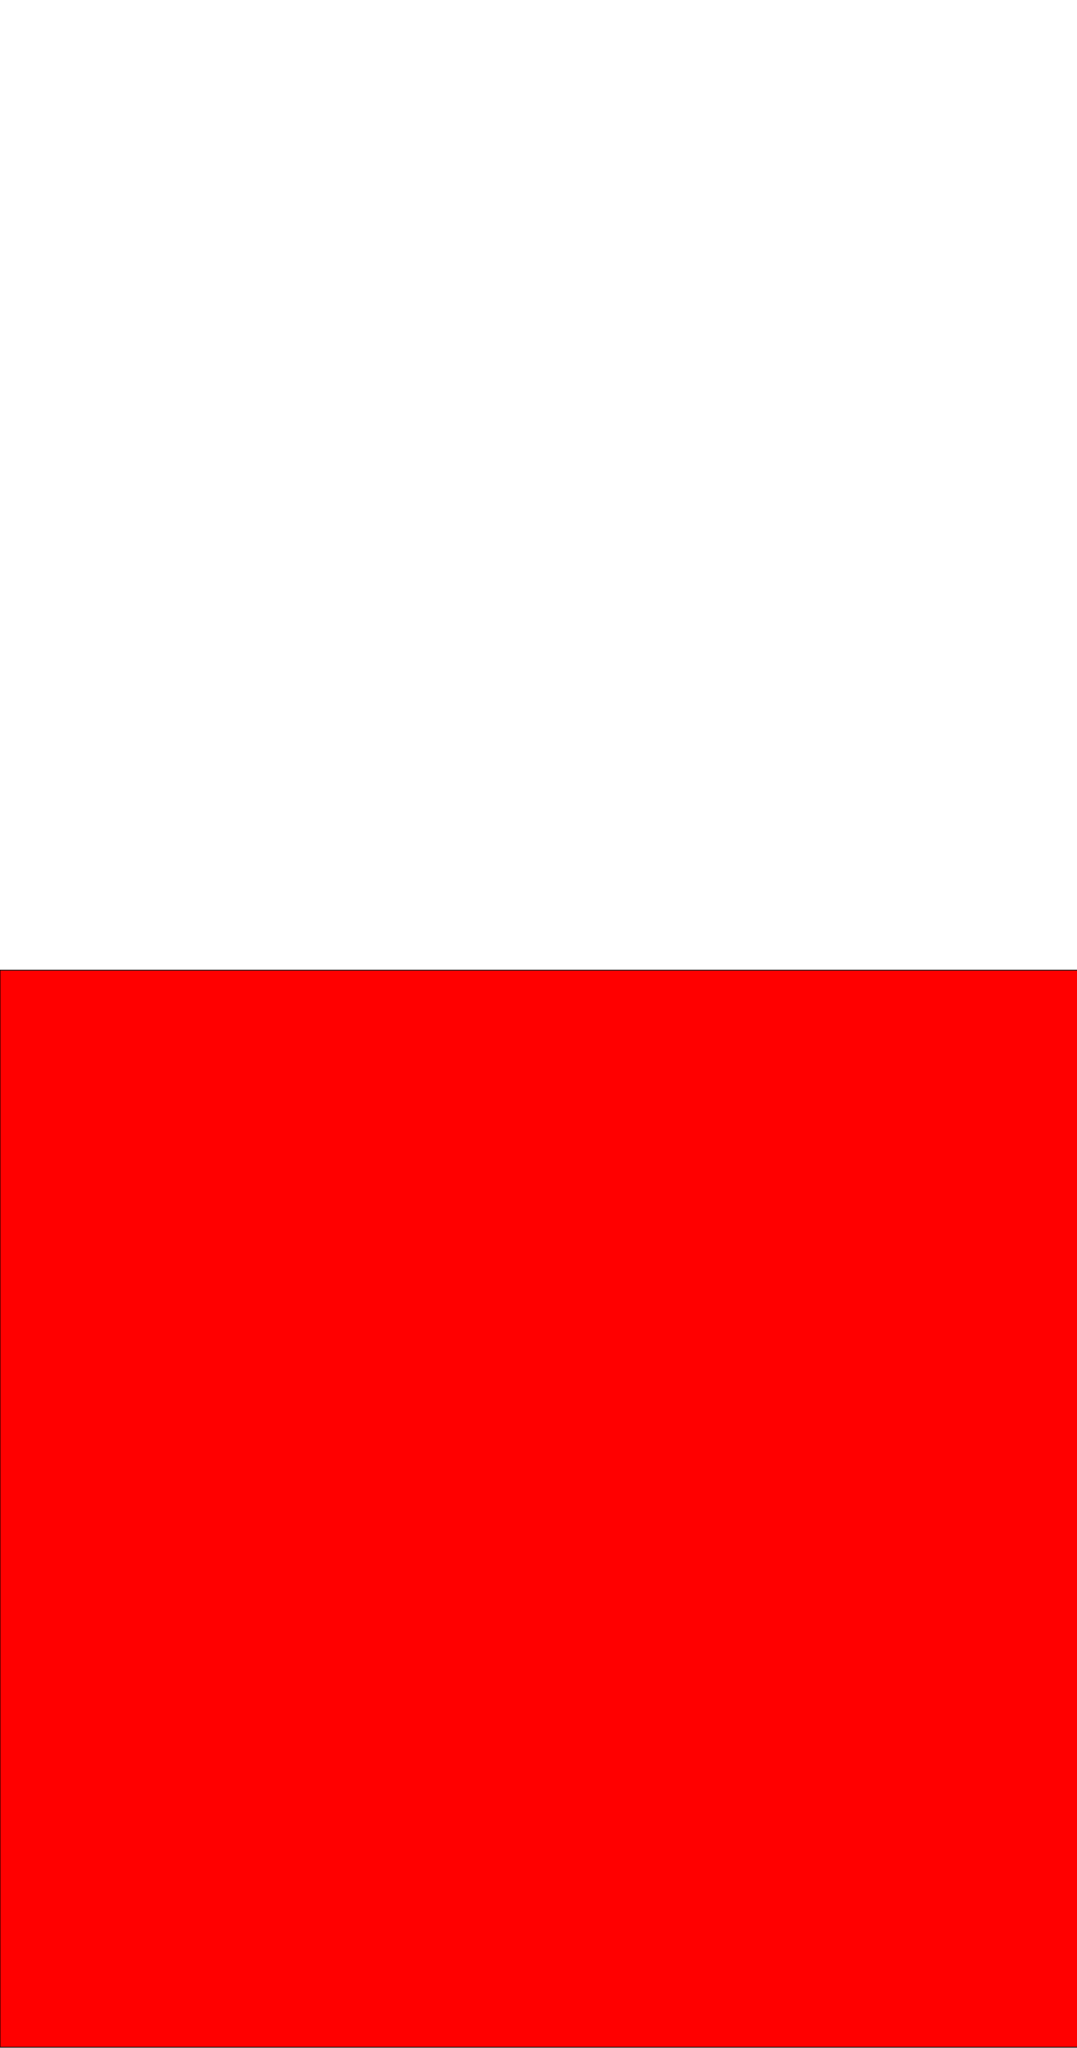

In [39]:
flag